In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [21]:
data = pd.read_csv('student_depression_dataset.csv')
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [19]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [25]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


27901 values, mean age of about 25.8, mean acad pressure of 3.14/5, mean work pressure close to 0 (students not working). mean CGPA of 7.66/10. mean studey satisfaction  of 2.94/5. mean work and study hours per day of 7.15

# univariate analysis

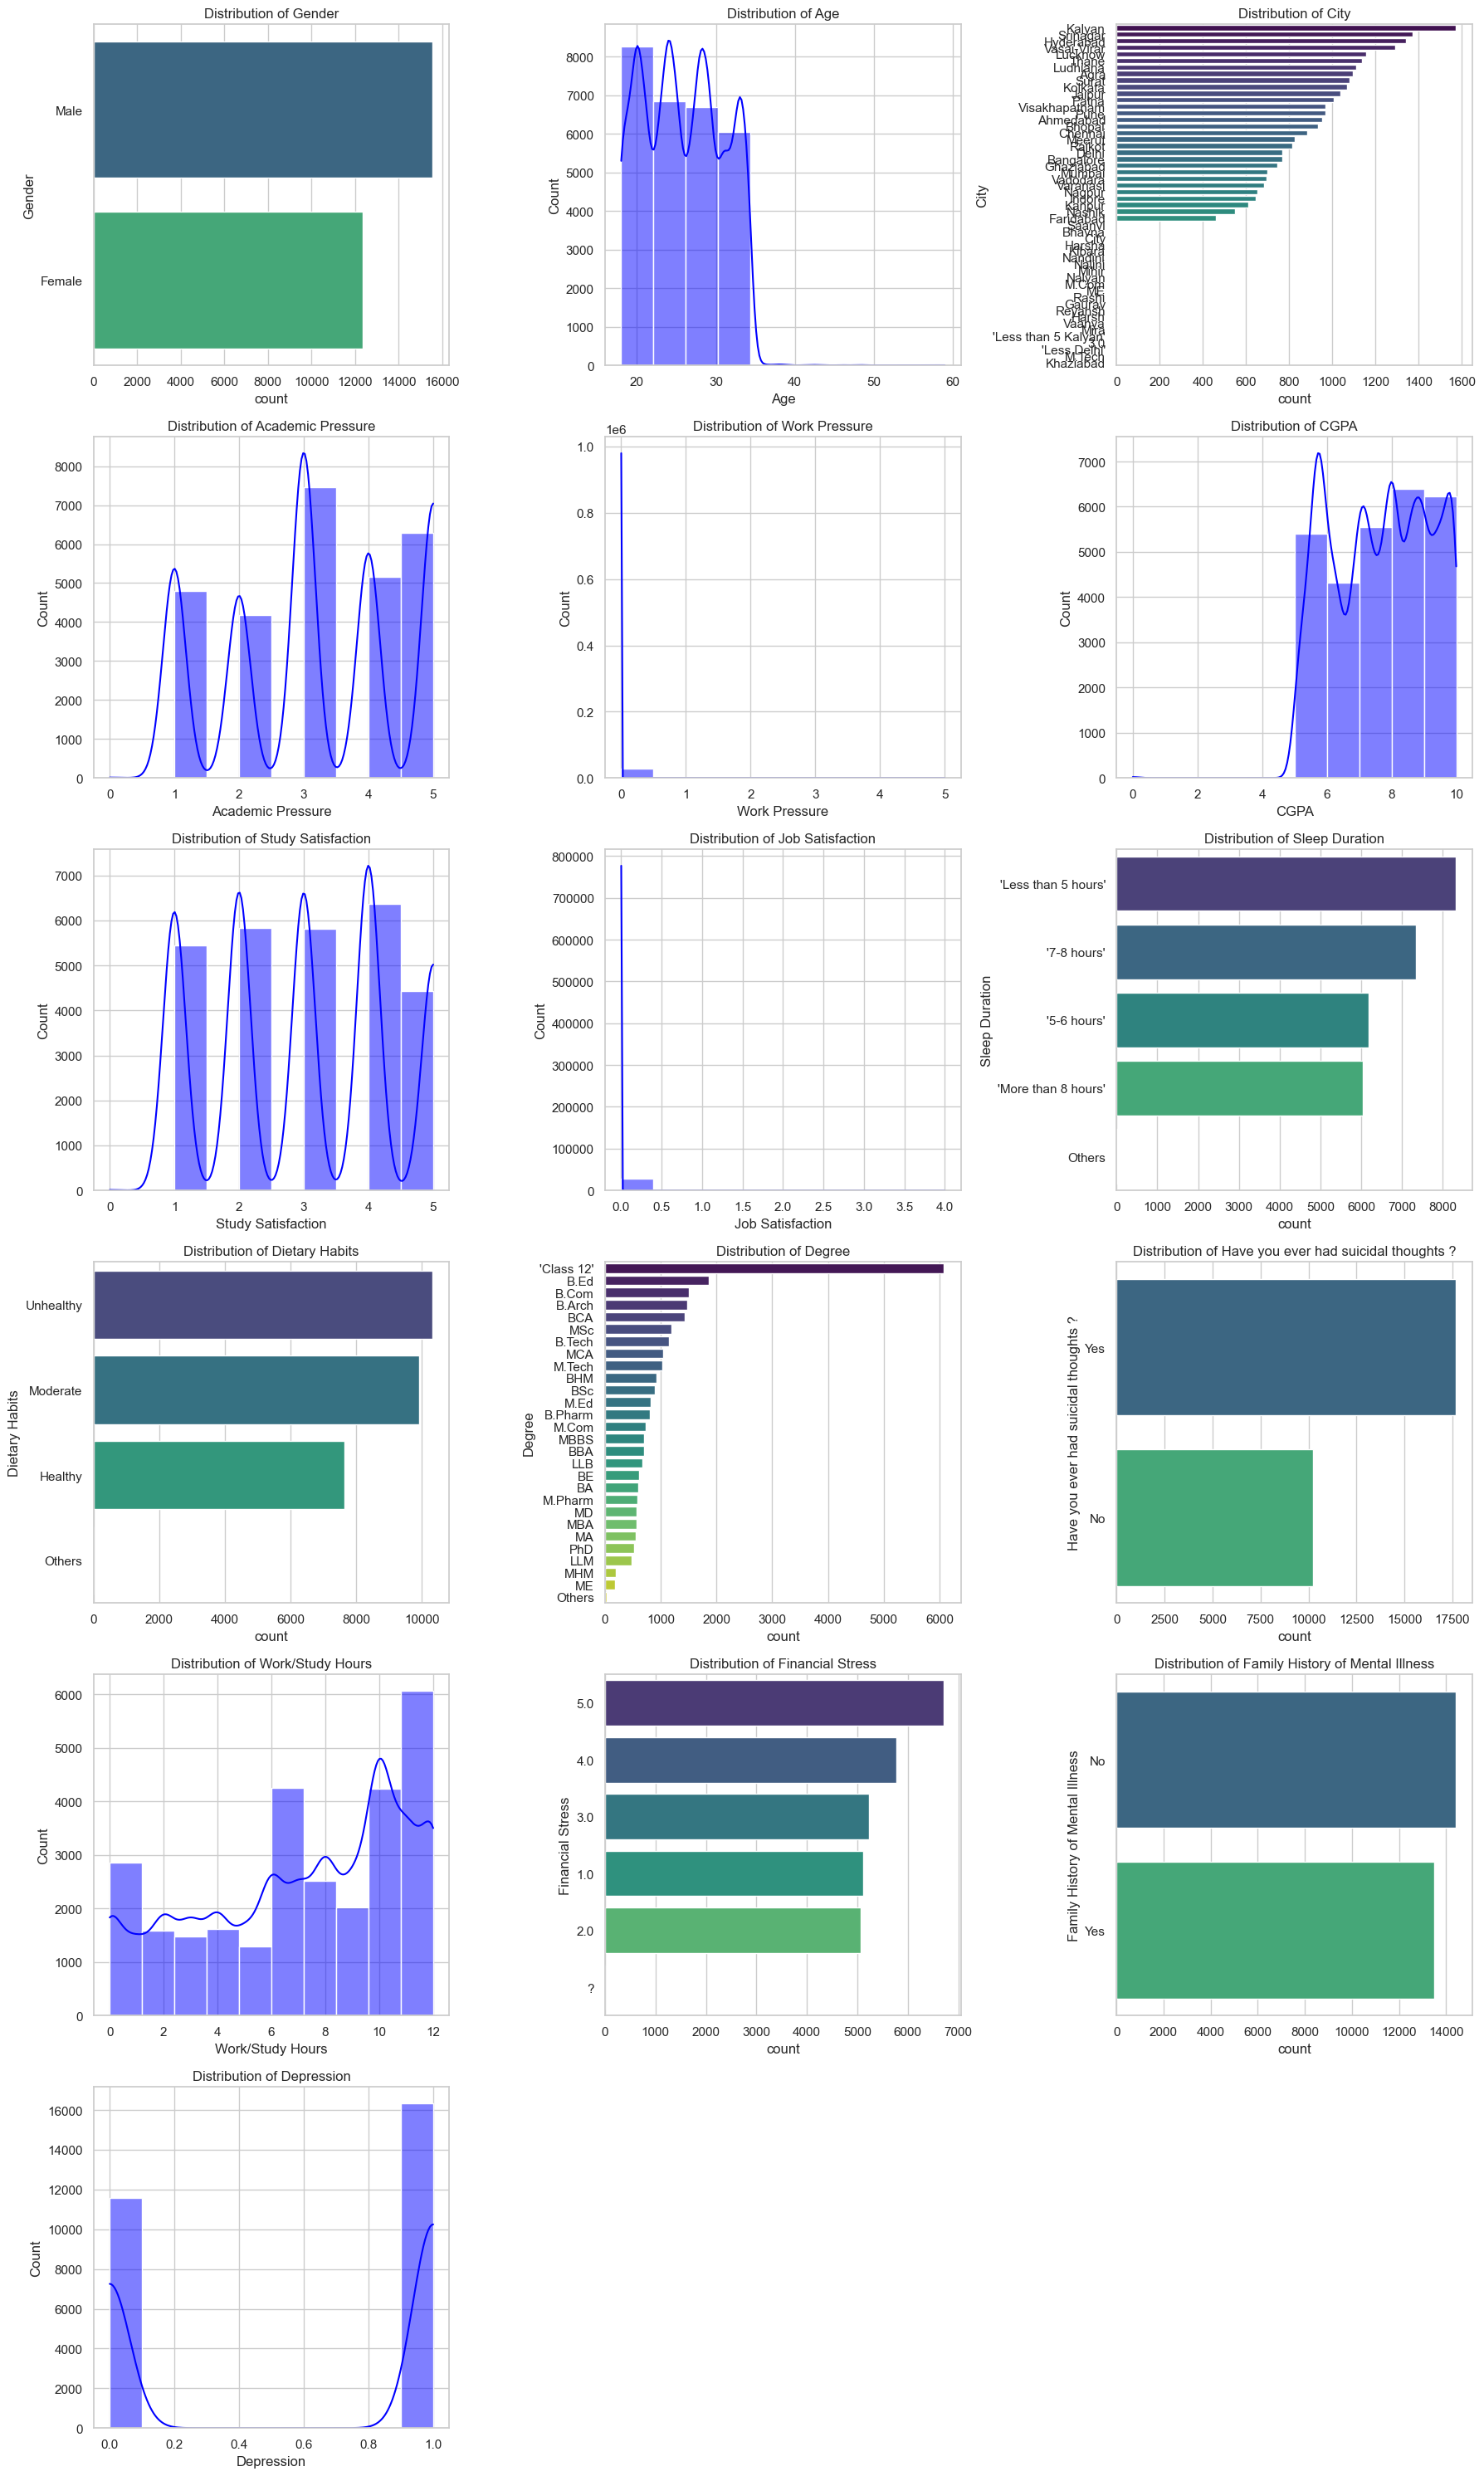

In [26]:
df = pd.DataFrame(data)

columns_to_exclude = ["id", "Profession"]
df = df.drop(columns=columns_to_exclude)


# Setting plot style
sns.set(style="whitegrid")

# Number of columns to visualize
num_cols = len(df.columns)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

# Creating subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Univariate analysis for each column
for i, col in enumerate(df.columns):
    ax = axes[i]
    if df[col].dtype == 'object':
        # Categorical variables - Bar plot
        sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index, ax=ax)
        ax.set_title(f"Distribution of {col}")
    else:
        # Numerical variables - Histogram
        sns.histplot(df[col], kde=True, bins=10, color='blue', ax=ax)
        ax.set_title(f"Distribution of {col}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Bivariate analysis

In [ ]:
df = pd.DataFrame(data)

# Exclude unwanted columns
df = df.drop(columns=["id", "City", "Profession", "Degree"])

# Manually populate the variable lists
num_vars = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", 
            "Job Satisfaction", "Work/Study Hours", "Financial Stress"]

binary_vars = ["Gender", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

cat_vars = ["Sleep Duration", "Dietary Habits"]

# Clean the dataset
# 1. Convert non-numeric columns to numeric where necessary
label_encoder = LabelEncoder()

# Encode binary columns (Gender, Have you ever had suicidal thoughts?, Family History of Mental Illness)
df["Family History of Mental Illness"] = label_encoder.fit_transform(df["Family History of Mental Illness"])
df["Have you ever had suicidal thoughts ?"] = label_encoder.fit_transform(df["Have you ever had suicidal thoughts ?"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Encode categorical columns with more than two categories (Sleep Duration, Dietary Habits)
df["Sleep Duration"] = df["Sleep Duration"].map({"'Less than 5 hours'": 0, "'5-6 hours'": 1, "'7-8 hours'": 2, "'More than 8 hours'": 3})
df["Dietary Habits"] = df["Dietary Habits"].map({"Unhealthy":0, "Moderate": 1, "Healthy": 2})

# Ensure all columns are numeric (for those that should be)
df = df.apply(pd.to_numeric, errors='ignore')  # Convert everything to numeric except categorical columns

# 2. Handle missing data (if any)
# Explicitly ensure all columns are numeric
for col in df.columns:
    # Convert columns with strings or mixed types to numbers (if possible)
    if df[col].dtype == 'object':  # Check if the column contains non-numeric types
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert and set invalid parsing as NaN

# Handle any NaN values that might appear after the coercion
df.fillna(df.mean(numeric_only=True), inplace=True)  # For numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

# Verify that all columns are numeric
print("Data Types After Cleaning:")
print(df.dtypes)
#  Missing Value Analysis
print("\nMissing Value Counts:")
print(df.isnull().sum())

# Function to calculate Phi coefficient (for binary variables)
def phi_coefficient(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi = np.sqrt(chi2 / n)
    return phi

# Create a correlation matrix
correlation_matrix = pd.DataFrame(np.nan, index=df.columns, columns=df.columns)

# For numerical variables, calculate Point Biserial correlation
for col in num_vars:
    correlation_matrix["Depression"][col] = pointbiserialr(df["Depression"], df[col])[0]
    correlation_matrix[col]["Depression"] = pointbiserialr(df["Depression"], df[col])[0]

# For binary variables, calculate Phi coefficient
for col in binary_vars:
    phi_val = phi_coefficient(df["Depression"], df[col])
    correlation_matrix["Depression"][col] = phi_val
    correlation_matrix[col]["Depression"] = phi_val

# For categorical variables (non-binary), calculate Point Biserial correlation after encoding
for col in cat_vars:
    correlation_matrix["Depression"][col] = pointbiserialr(df["Depression"], df[col])[0]
    correlation_matrix[col]["Depression"] = pointbiserialr(df["Depression"], df[col])[0]

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features Against Depression")
plt.show()

C:\Users\Isaac\AppData\Local\Temp\ipykernel_49276\2787908559.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert everything to numeric except categorical columns
C:\Users\Isaac\AppData\Local\Temp\ipykernel_49276\2787908559.py:61: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment 

Data Types After Cleaning:
Gender                                     int32
Age                                      float64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                           float64
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Depression                                 int64
dtype: object

Missing Value Counts:
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                 

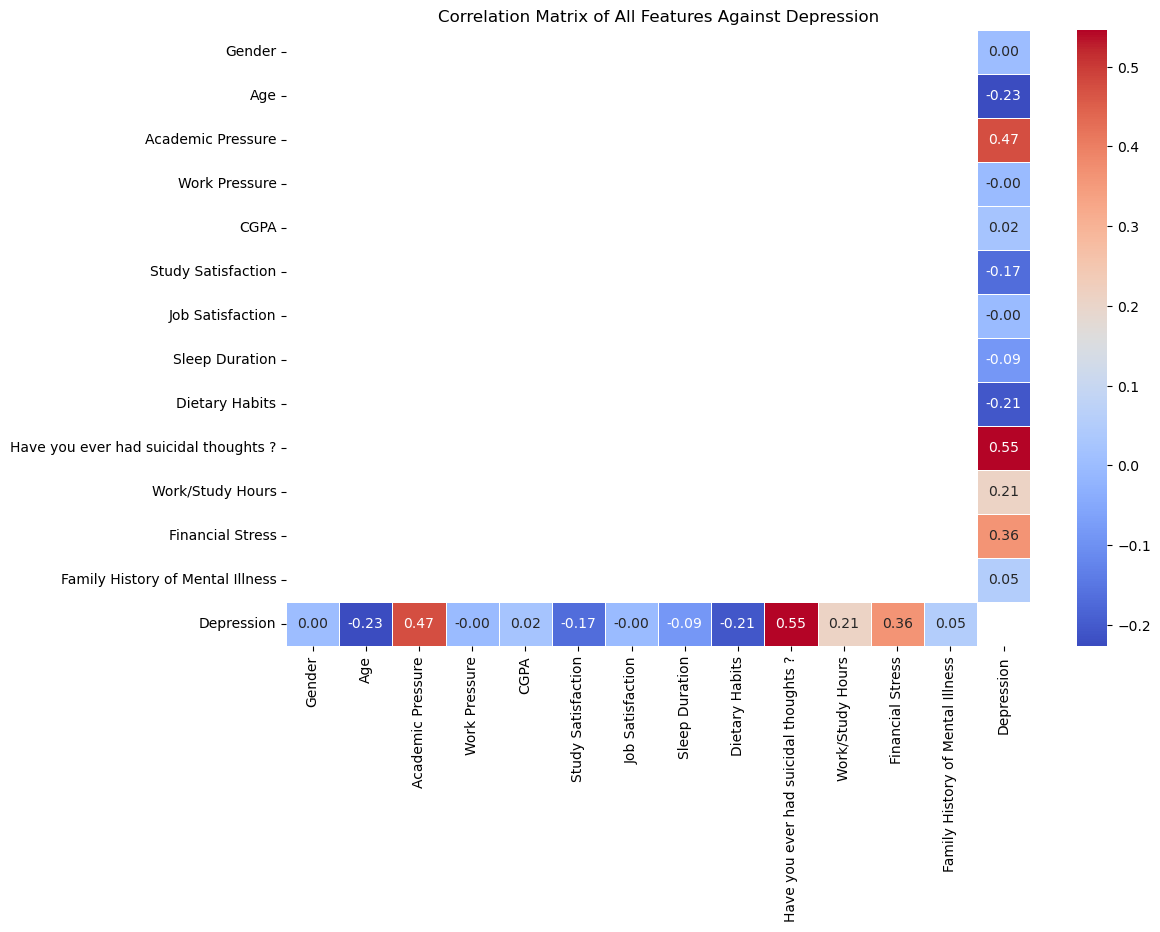

correlation analysis of each variable with instance of depression. since the output variable is binary (1 or 0 for derpression), correlation has to be calculated slightly differently and regression cannot be used. For categorical values, we encoded them to numeric values based on their severity (eg sleep duration mapped from 0-4 in increasing order of sleep). for these categorical values an numeric values, we performed point bi-serial correlation with depression. for binary columns (eg have you ever had suicidal thoughts and gender), we used phi coefficient against depression. 

from the results we see that academic pressure, having suicidal thoughts and financial stress are among the few leading indicators of depression in students

# Linearity Analysis

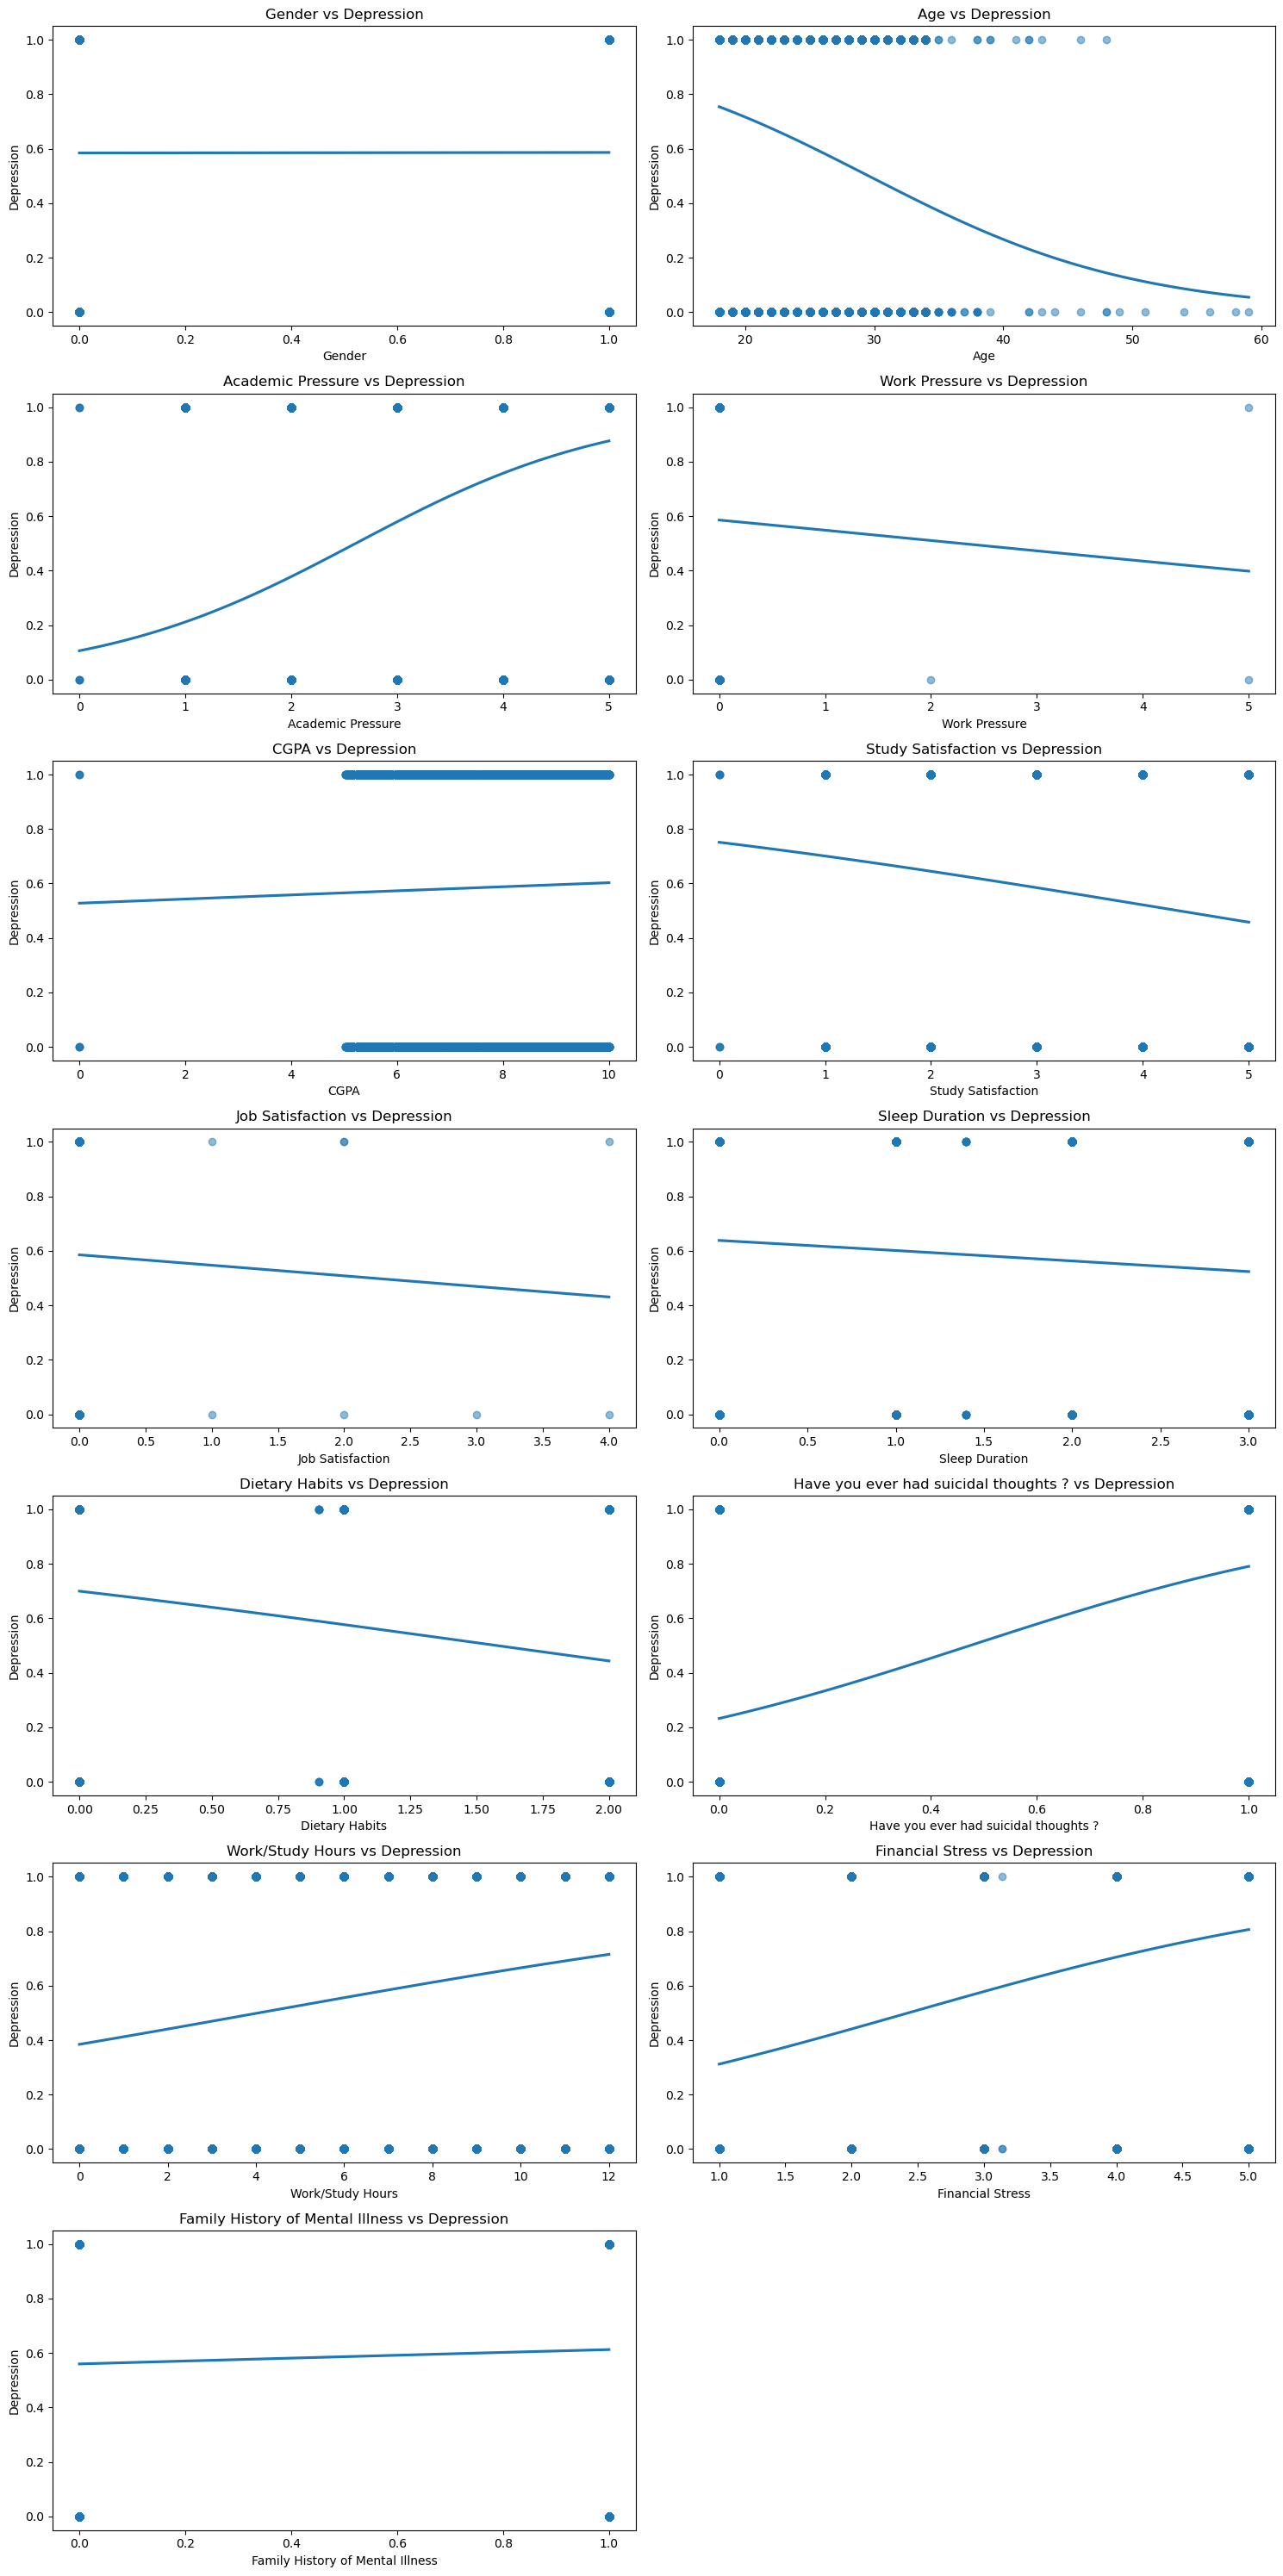

In [7]:
features = [
    'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness'
]

# Plot logistic regression line for each feature vs Depression
plt.figure(figsize=(15, 30))
for i, feature in enumerate(features):
    plt.subplot(len(features) // 2 + 1, 2, i + 1)
    sns.regplot(
        x=df[feature], 
        y=df['Depression'], 
        logistic=True,
        ci=None,
        scatter_kws={'alpha': 0.5}
    )
    plt.title(f'{feature} vs Depression')

plt.tight_layout()
plt.show()

# OUTLIER ANALYSIS

Columns with outliers:
- Age
- Academic Pressure
- Work Pressure
- CGPA
- Study Satisfaction
- Job Satisfaction
- Work/Study Hours
- Depression


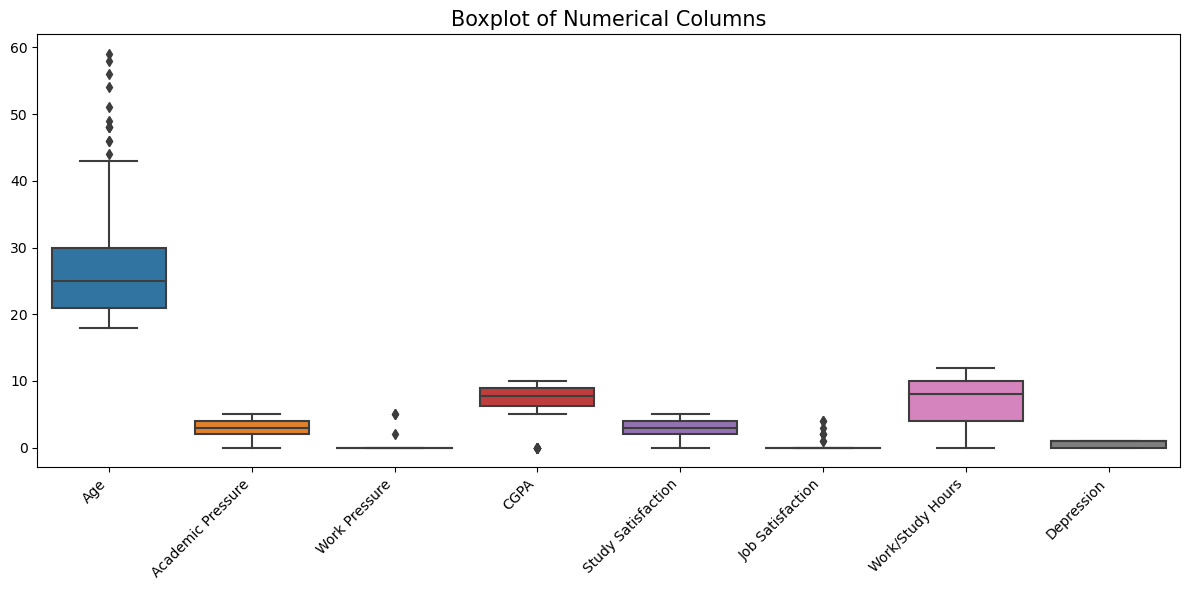

In [6]:
# Step 1: Identify numerical columns, excluding the 'id' column
num_cols = data.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if c.lower() != 'id']

# Step 2: Define a function to detect outliers using the IQR approach
def find_outliers_by_iqr(df, cols):
    outlier_dict = {}
    for column in cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_rows = df[(df[column] < lower) | (df[column] > upper)]
        outlier_dict[column] = outlier_rows
    return outlier_dict

# Apply the IQR outlier detection function
iqr_outliers = find_outliers_by_iqr(data, num_cols)

# Display which columns contain outliers
print("Columns with outliers:")
for column_name, rows in iqr_outliers.items():
    print(f"- {column_name}")

# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols])
plt.title('Boxplot of Numerical Columns', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

few outliers in many numerical categories, indicates that data is well grouped and consitent, good for some models that may be sensitive to outlier data

# DATA FINAL ANALYSIS: 
characteristics:
- vast amount of data (27901)
- each individually with low linear correlation to depression: low correlation using point biserial/phi coefficient
- some non linear relationships (flat or sigmoidal) when visualised with a regplot with logistic = true
i have several input variables which are flat, several which are slightly linear and some sigmoidal. but given the vast amount of input data, low correlation of individual variables to depression, is it a good idea to use an ann

## select ANN:
Even if each individual feature looks weak or flat (non linearly related/complex relation), the combination of them could be highly predictive. ANNs are great at detecting these subtle, multi-feature interactions that linear models often miss.

## ANN justification:
use of RELU activation function in middle layer:
relu only allows x to pass through if x is more than 0
1. Captures Piecewise Linear Patterns
ReLU is perfect for breaking up the input space into pieces, each with its own linear rule. This means:
It can model features that are linear in parts.
It can approximate sigmoidal shapes by stacking multiple ReLU layers.

2. Ignores Irrelevant (Flat) Features
If some inputs are flat or irrelevant, ReLU naturally zeros them out when weights are small or negative.
This helps the model focus on meaningful signals from the data.

use of sigmoid activation function in final layer:
For binary classification (depression: 0 or 1): The sigmoid activation squashes the final output into the range [0, 1], which makes it interpretable as a probability.

# DATA PREPROCESSING

In [23]:
df = pd.DataFrame(data)

# Exclude unwanted columns
df = df.drop(columns=["id", "City", "Profession", "Degree"])

# Manually populate the variable lists
num_vars = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", 
            "Job Satisfaction", "Work/Study Hours", "Financial Stress"]

binary_vars = ["Gender", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

cat_vars = ["Sleep Duration", "Dietary Habits"]

# Clean the dataset
# 1. Convert non-numeric columns to numeric where necessary
label_encoder = LabelEncoder()

# Encode binary columns (Gender, Have you ever had suicidal thoughts?, Family History of Mental Illness)
df["Family History of Mental Illness"] = label_encoder.fit_transform(df["Family History of Mental Illness"])
df["Have you ever had suicidal thoughts ?"] = label_encoder.fit_transform(df["Have you ever had suicidal thoughts ?"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Encode categorical columns with more than two categories (Sleep Duration, Dietary Habits)
df["Sleep Duration"] = df["Sleep Duration"].map({"'Less than 5 hours'": 0, "'5-6 hours'": 1, "'7-8 hours'": 2, "'More than 8 hours'": 3})
df["Dietary Habits"] = df["Dietary Habits"].map({"Unhealthy":0, "Moderate": 1, "Healthy": 2})

# Ensure all columns are numeric (for those that should be)
df = df.apply(pd.to_numeric, errors='ignore')  # Convert everything to numeric except categorical columns

# 2. Handle missing data (if any)
# Explicitly ensure all columns are numeric
for col in df.columns:
    # Convert columns with strings or mixed types to numbers (if possible)
    if df[col].dtype == 'object':  # Check if the column contains non-numeric types
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert and set invalid parsing as NaN

# Handle any NaN values that might appear after the coercion
df.fillna(df.mean(numeric_only=True), inplace=True)  # For numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

# Verify that all columns are numeric
print("Data Types After Cleaning:")
print(df.dtypes)
#  Missing Value Analysis
print("\nMissing Value Counts:")
print(df.isnull().sum())

df.head()

Data Types After Cleaning:
Gender                                     int32
Age                                      float64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                           float64
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Depression                                 int64
dtype: object

Missing Value Counts:
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                 

C:\Users\Isaac\AppData\Local\Temp\ipykernel_32072\4140879200.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert everything to numeric except categorical columns


,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,0.0,8.97,2.0,0.0,1.0,2.0,1,3.0,1.0,0,1
1,0,24.0,2.0,0.0,5.90,5.0,0.0,1.0,1.0,0,3.0,2.0,1,0
2,1,31.0,3.0,0.0,7.03,5.0,0.0,0.0,2.0,0,9.0,1.0,1,0
3,0,28.0,3.0,0.0,5.59,2.0,0.0,2.0,1.0,1,4.0,5.0,1,1
4,0,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,1,1.0,1.0,0,0


In [25]:
# Define feature groups
num_vars = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", 
            "Job Satisfaction", "Work/Study Hours", "Financial Stress"]

# Normalize numeric features
scaler = MinMaxScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# Split into features and target
X = df.drop("Depression", axis=1)
y = df["Depression"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Define the ANN model
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid outputs a probability between 0 and 1
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.1, verbose=0)


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [51]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

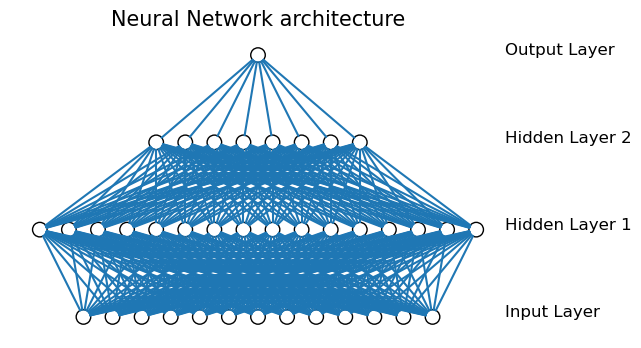

In [55]:
network = DrawNN( [13,16,8,1] )
network.draw()

175/175 [==============================] - 0s 2ms/step


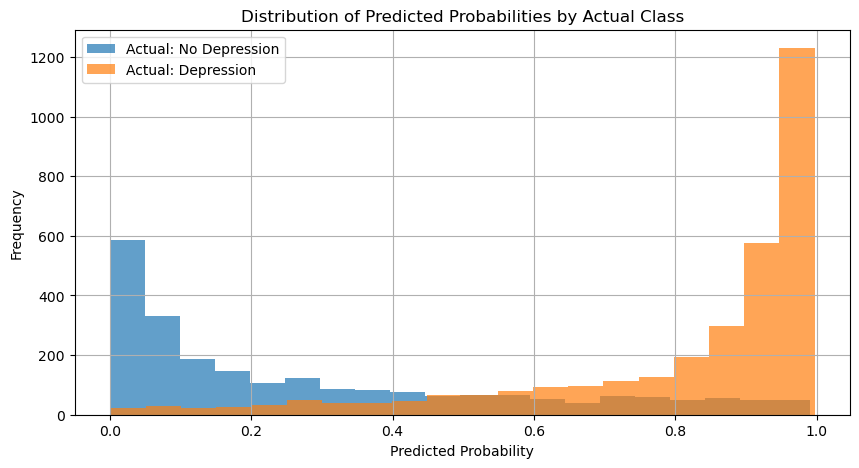

In [33]:
# Predict probability
y_pred_prob = model.predict(X_test)

# Convert to percentage
y_pred_percent = y_pred_prob * 100

# Optional: classify based on threshold (e.g., 0.5)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# # Show predictions
# for i in range(len(y_pred_prob)):
#     print(f"Predicted probability of depression: {y_pred_percent[i][0]:.2f}%")

# Sort by probability (optional)
# sorted_indices = np.argsort(-y_pred_prob.flatten())
# top_n = 10  # top 10 predictions

# plt.figure(figsize=(10, 6))
# plt.bar(range(top_n), y_pred_percent[sorted_indices][:top_n].flatten())
# plt.xticks(range(top_n), [f'Sample {i}' for i in sorted_indices[:top_n]])
# plt.ylabel('Predicted Probability (%)')
# plt.title('Top Predicted Probabilities')
# plt.ylim(0, 100)
# plt.grid(True)
# plt.show()

# y_test_arr = y_test.to_numpy()
# # Make sure y_test is a numpy array
# plt.figure(figsize=(12, 6))
# plt.plot(y_pred_percent, label='Predicted %')
# plt.plot(y_test_arr * 100, label='Actual (x100)', alpha=0.6)
# plt.title('Predicted vs. Actual Depression Probabilities')
# plt.xlabel('Sample Index')
# plt.ylabel('Probability (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 5))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.7, label='Actual: No Depression')
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.7, label='Actual: Depression')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities by Actual Class")
plt.legend()
plt.grid(True)
plt.show()




Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2343
           1       0.84      0.89      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Confusion Matrix:
 [[1800  543]
 [ 368 2870]]
ROC AUC Score: 0.91


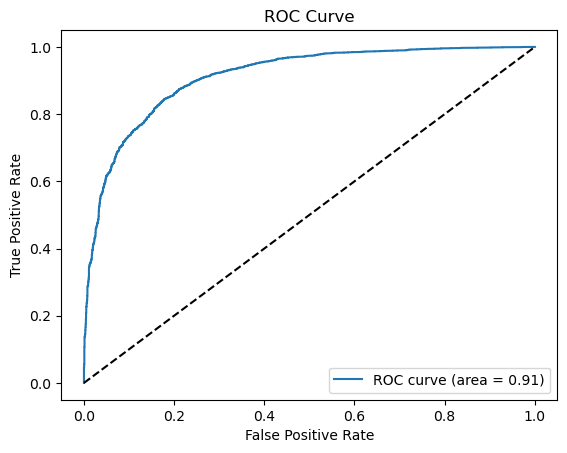

In [35]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
